In [1]:
import datetime
import os
import pathlib
import pickle

from dateutil.relativedelta import relativedelta


import camelot
import dateparser
import magic
import pandas as pd
import requests
import tabula

from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
os.chdir('../data/interim/')
!ls

dict_of_dfs_by_datetime.pkl


In [3]:
filename = 'dict_of_dfs_by_datetime.pkl'
with open(filename, 'rb') as f:
    dfs = pickle.load(f)

len(dfs)

18

In [4]:
keys = [key for key in dfs.keys()]

In [5]:
date_time = keys[0]

In [6]:
df = dfs[keys[0]]
df.head()

1        2        3  \
Sigle Family Detached Listings                     646      515      719    
                      Listings YTD               17,428   17,109   18,425   
                      Sales                        554      451      464    
                      Sales YTD                  10,098    9,983   10,533   
                      Sales to Listings Ratio      86%      88%      65%    

                                                      4        5  
Sigle Family Detached Listings                     534      415   
                      Listings YTD               16,114   14,977  
                      Sales                        495      480   
                      Sales YTD                  11,536   10,513  
                      Sales to Listings Ratio      93%     116%

In [7]:
columns = [date_time - relativedelta(years=n) for n in range(5)]
columns

[datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0)]

In [8]:
df.columns = columns
df.head()

2017-12-31 2016-12-31  \
Sigle Family Detached Listings                       646        515    
                      Listings YTD                 17,428     17,109   
                      Sales                          554        451    
                      Sales YTD                    10,098      9,983   
                      Sales to Listings Ratio        86%        88%    

                                               2015-12-31 2014-12-31  \
Sigle Family Detached Listings                       719        534    
                      Listings YTD                 18,425     16,114   
                      Sales                          464        495    
                      Sales YTD                    10,533     11,536   
                      Sales to Listings Ratio        65%        93%    

                                               2013-12-31  
Sigle Family Detached Listings                       415   
                      Listings YTD                 14,977  
                      Sales                          480   
                      Sales YTD                    10,513  
                      Sales to Listings Ratio       116%

In [9]:
df_list = []
for key, df in dfs.items():
    df.columns = [key - relativedelta(years=n)
                  for n in range(5)]
    df_list.append(df)

In [65]:
master_df = pd.concat(df_list, axis=1).replace('[\$,\%]', '', regex=True).sort_index(axis=1).astype(float)
master_df.head()

In [70]:
path = pathlib.Path('../processed/')
path.mkdir(parents=True, exist_ok=True)

filename = '../processed/master_df.pkl'
with open(filename, 'wb+') as f:
    pickle.dump(master_df, f)

In [58]:
condos = master_df.loc['Condominium']
condos['strind'] = condos.index
monthly_condos = condos.loc[~condos['strind'].str.contains('YTD')].drop('strind', axis=1)

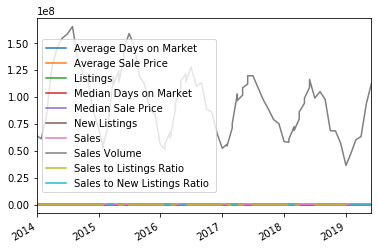

In [59]:
monthly_condos.transpose().plot()

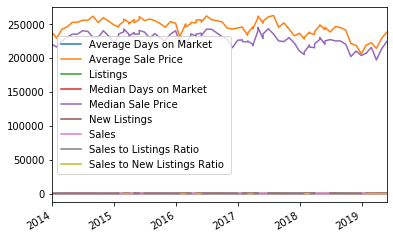

In [61]:
monthly_condos.drop('Sales Volume').transpose().plot()

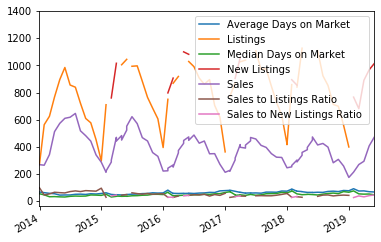

In [64]:
montly_condos.drop(['Sales Volume',
                    'Average Sale Price',
                    'Median Sale Price']).transpose().plot()

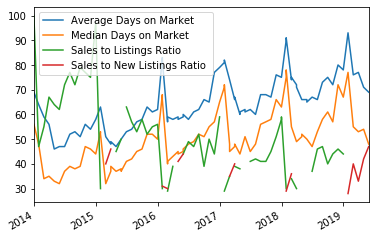

In [69]:
montly_condos.drop(['Sales Volume',
                    'Average Sale Price',
                    'Median Sale Price',
                    'Listings ',
                    'New Listings ',
                    'Sales ',
                   ]).transpose().plot()